In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error ,r2_score

## 1. Load and Explore the Dataset

In [22]:
df = pd.read_csv("data/Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [23]:
df.shape

(10000, 6)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [25]:
df[df.duplicated()]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [26]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


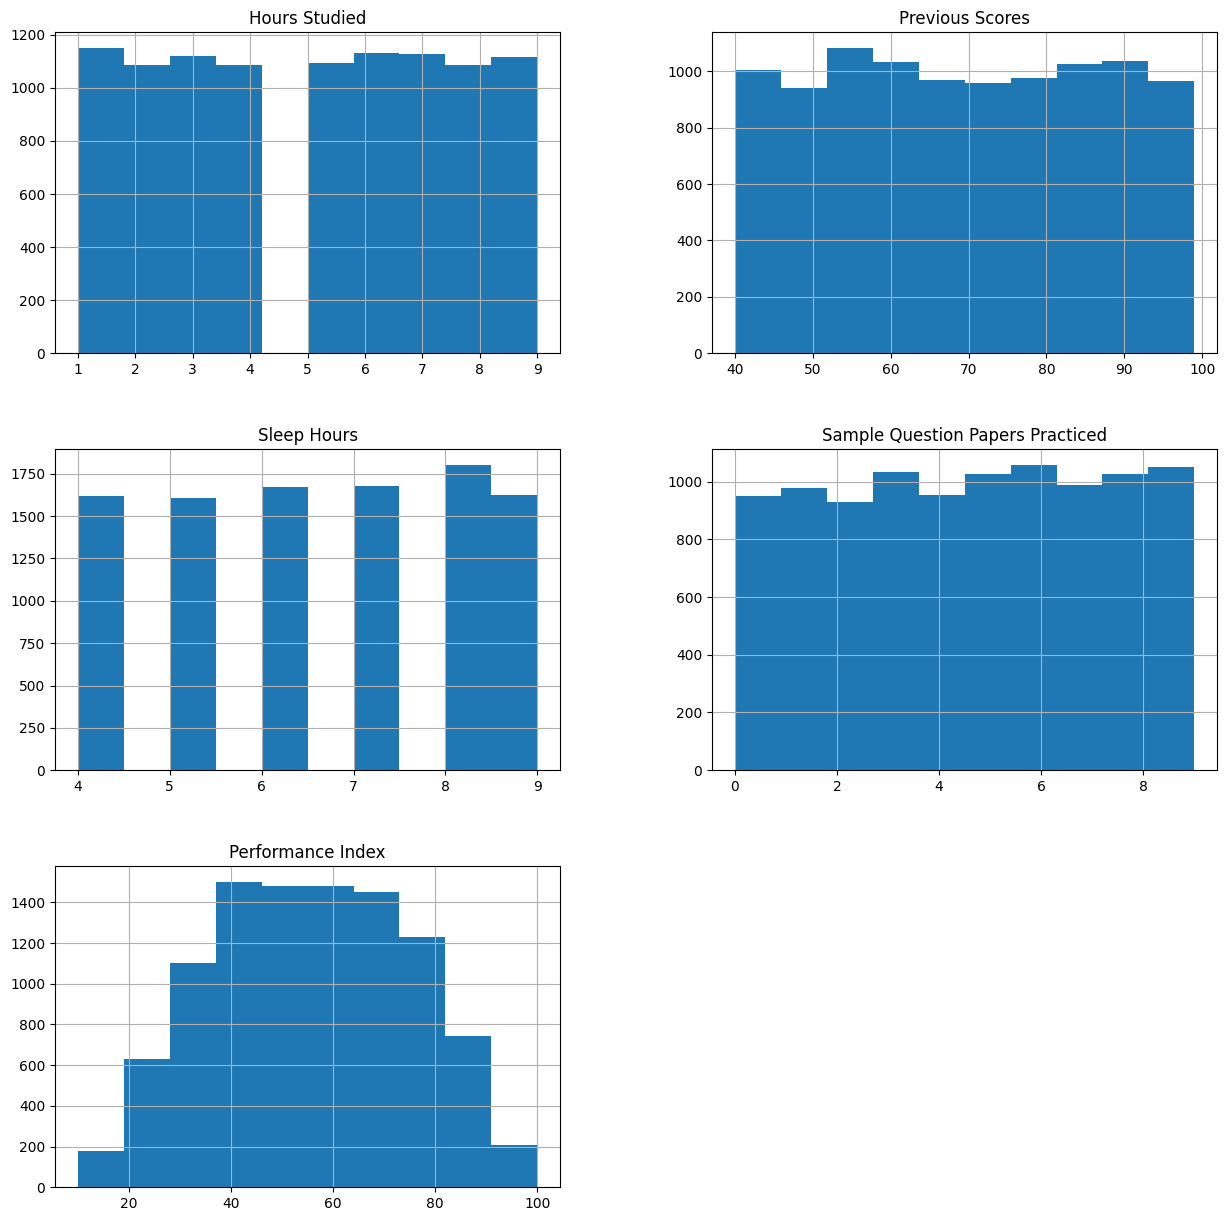

In [27]:
df.hist(figsize=(15, 15))
plt.show()

In [28]:
df.corr(numeric_only=True)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


<Axes: >

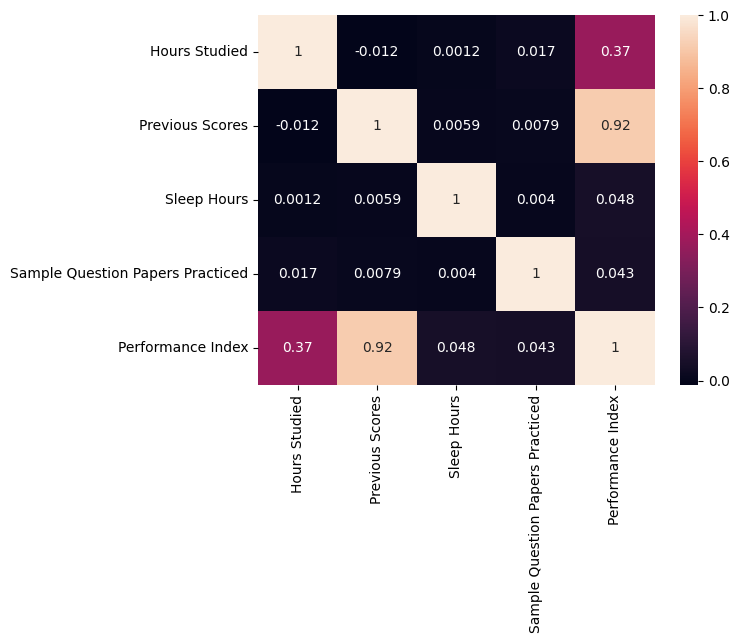

In [29]:
sn.heatmap(df.corr(numeric_only=True), annot=True)

## 2. Data Preprocessing

In [30]:
df = pd.get_dummies(df, drop_first=True)
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,True
1,4,82,4,2,65.0,False
2,8,51,7,2,45.0,True
3,5,52,5,2,36.0,True
4,7,75,8,5,66.0,False
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,True
9996,7,64,8,5,58.0,True
9997,6,83,8,5,74.0,True
9998,9,97,7,0,95.0,True


In [31]:
X = df.drop('Previous Scores', axis=1)
y = df['Previous Scores']

In [32]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Build the Regression Model

In [33]:
lr = LinearRegression()
lr.fit(Xtr,ytr)

LinearRegression()

In [34]:
lr.coef_

array([-2.76870101, -0.4627853 , -0.18526002,  0.97028636, -0.58928941])

## 4. Evaluate the Model

In [35]:
y_pred = lr.predict(Xte)

In [36]:
print(f"Mean Squared Error (MSE):{mean_squared_error(yte,y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(yte, y_pred):.2f}")
print(f"R-squared (R²): {r2_score(yte, y_pred):.2f}")

Mean Squared Error (MSE):3.84
Root Mean Squared Error (RMSE): 1.96
R-squared (R²): 0.99
